## EX1
The number of particles emitted by a radioactive source during a fixed interval of time (∆t =
10 s) follows a Poisson distribution on the parameter µ. The number of particles observed during
consecutive time intervals is: 4, 1, 3, 1 and 3

**a)** suppose a uniform prior distribution for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

Since this is a Poisson process the likelihood of a single measurement is
$$f(x | \mu)=\frac{\mu^{x} \mathrm{e}^{-\mu}}{x !}$$
the fact that the measurements are indipendet then allows us to write the likelihood for multiplu measurement as:
$$f\left(\left\{x_{j}\right\} | \mu\right)=\prod_{j=1}^{n} f\left(x_{j} | \mu\right)  = \frac{1}{C} \mu^{\sum x_{j}} \mathrm{e}^{(-n \mu)}$$

Assuming an uniform prior we obtain a posterior distribution proportional to the likehood, namely:
$$
P\left(\mu |\left\{x_{j}\right\}\right)= \frac{1}{C'} \mu^{\sum x_{j}} \mathrm{e}^{-n \mu}
$$

where $C'$ is a normalization constant, as we can see this distribution is a Gamma Function $$ Gamma(\alpha , \lambda) \qquad \alpha=\sum x_{j}+1 \quad \lambda=n$$

we then know that the analytical value of mean and mode are:
$$ E[\mu] = \frac{\alpha}{\lambda} \qquad \mu_{maxP}= \frac{\alpha-1}{\lambda} $$

This values can then be compared with theie numerical computation.


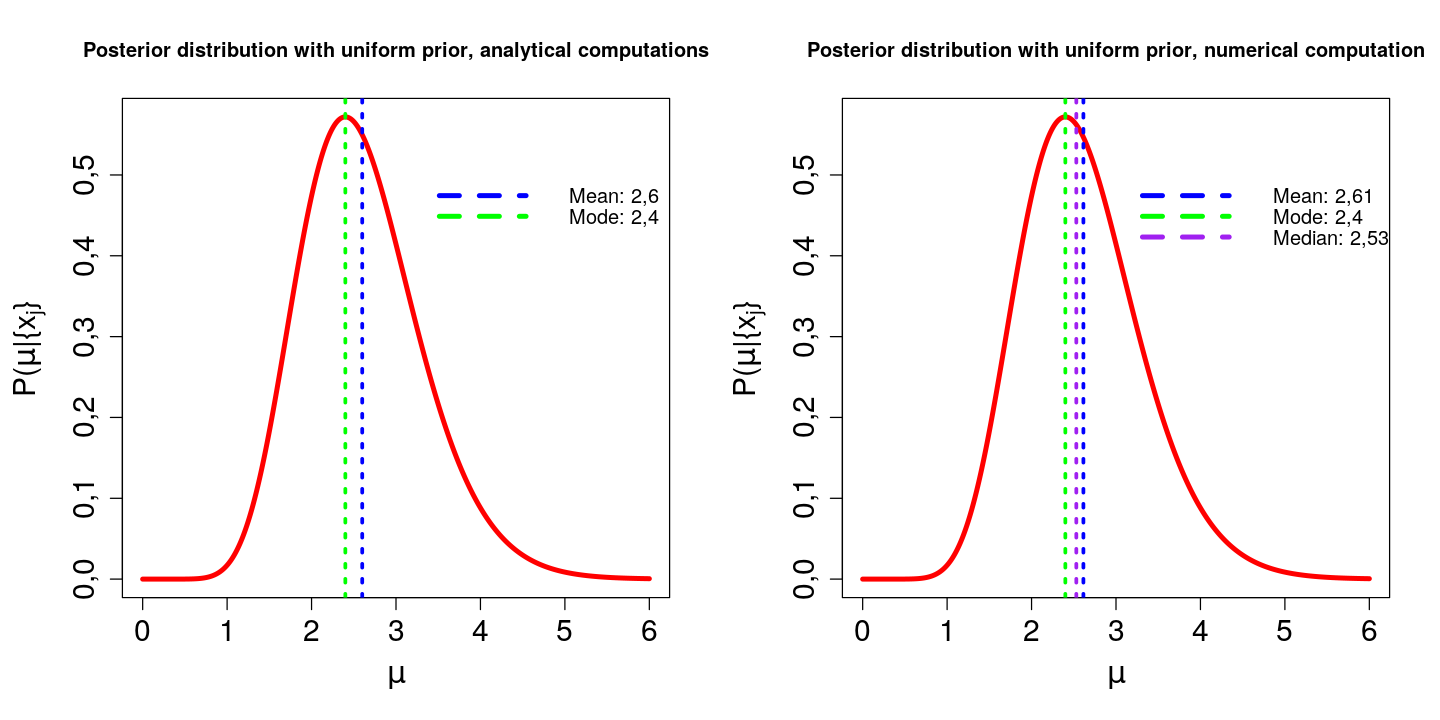

In [1]:
obs <- c(4,1,3,1,3)
flat_alpha <- sum(obs)+1
flat_lambda <- length(obs)

x <- seq(0,6,0.01)

#analytical values
flat_an_mean <- flat_alpha/flat_lambda
flat_an_mode <- (flat_alpha-1)/flat_lambda

#computed values
flat_nu_mean <- mean(rgamma(10000, flat_alpha, flat_lambda))
flat_nu_mode <- x[which.max(dgamma(x, flat_alpha, flat_lambda))]
flat_nu_medi <- x[which.min(abs(pgamma(x, flat_alpha, flat_lambda)-0.5 ))]

options(repr.plot.width=12,repr.plot.height=6)
par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)
plot (x, dgamma(x, flat_alpha, flat_lambda), type='l', col='red', lwd=4, xlab=expression(mu), 
      ylab=expression("P("*mu*"|{x"[j]*"}"), 
      main='Posterior distribution with uniform prior, analytical computations')

abline(v=flat_an_mean, lwd=3, col='blue', lty='dotted')
abline(v=flat_an_mode, lwd=3, col='green', lty='dotted')
legend(3,0.5, legend=c(paste("Mean:",flat_an_mean), paste("Mode:",flat_an_mode)), 
       col=c('blue', 'green'),  lty='dashed', lwd=4, bty='n',y.intersp=1)

plot (x, dgamma(x, flat_alpha, flat_lambda), type='l', col='red', lwd=4, xlab=expression(mu), 
      ylab=expression("P("*mu*"|{x"[j]*"}"), 
      main='Posterior distribution with uniform prior, numerical computation')
abline(v=flat_nu_mean, lwd=3, col='blue', lty='dotted')
abline(v=flat_nu_mode, lwd=3, col='green', lty='dotted')
abline(v=flat_nu_medi, lwd=3, col='purple', lty='dotted')

legend(2.8,0.5, legend=c(paste("Mean:",round(flat_nu_mean,2)), paste("Mode:",flat_nu_mode), 
                         paste("Median:", flat_nu_medi)),  col=c('blue', 'green', 'purple'),  
       lty='dashed', lwd=4, bty='n',y.intersp=1)

**b)** suppose a Jeffrey’s prior for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

Similarly to the previous case if we assume a Jeffrey's prior:
$$g(\mu) \propto \frac{1}{\sqrt{\mu}}$$
we obtain as posterior a Gamma distribution:

$$ Gamma(\alpha , \lambda) \qquad \alpha=\sum x_{j}+\frac{1}{2} \quad \lambda=n$$


So as before we can compute the mean and mode analytical and compare the result with a numerical computation

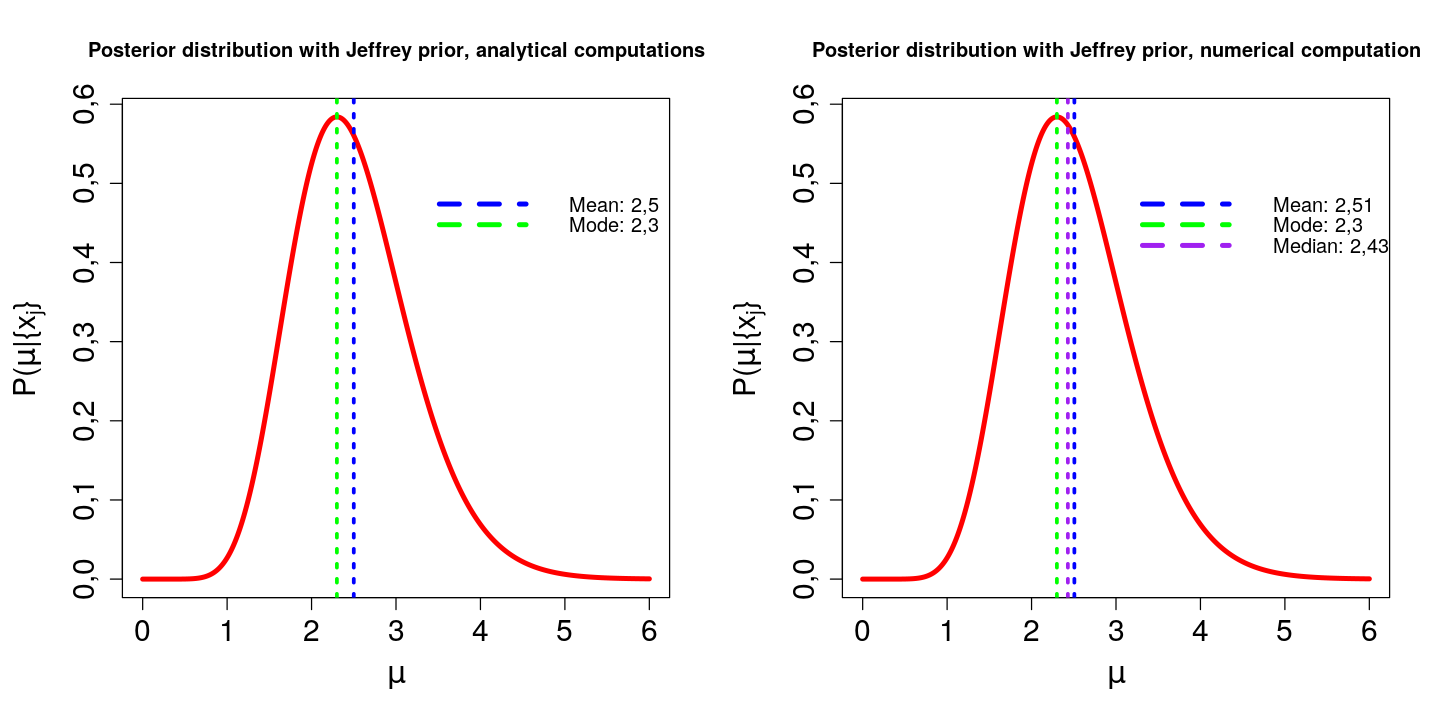

In [2]:
obs <- c(4,1,3,1,3)
jeff_alpha <- sum(obs)+0.5
jeff_lambda <- length(obs)

x <- seq(0,6,0.01)

#analytical values
jeff_an_mean <- jeff_alpha/jeff_lambda
jeff_an_mode <- (jeff_alpha-1)/jeff_lambda

#computed values
jeff_nu_mean <- mean(rgamma(10000, jeff_alpha, jeff_lambda))
jeff_nu_mode <- x[which.max(dgamma(x, jeff_alpha, jeff_lambda))]
jeff_nu_medi <- x[which.min(abs(pgamma(x, jeff_alpha, jeff_lambda)-0.5 ))]

options(repr.plot.width=12,repr.plot.height=6)
par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)
plot (x, dgamma(x, jeff_alpha, jeff_lambda), type='l', col='red', lwd=4, xlab=expression(mu), 
      ylab=expression("P("*mu*"|{x"[j]*"}"), 
      main='Posterior distribution with Jeffrey prior, analytical computations')

abline(v=jeff_an_mean, lwd=3, col='blue', lty='dotted')
abline(v=jeff_an_mode, lwd=3, col='green', lty='dotted')
legend(3,0.5, legend=c(paste("Mean:",jeff_an_mean), paste("Mode:",jeff_an_mode)), 
       col=c('blue', 'green'),  lty='dashed', lwd=4, bty='n',y.intersp=1)

plot (x, dgamma(x, jeff_alpha, jeff_lambda), type='l', col='red', lwd=4, xlab=expression(mu), 
      ylab=expression("P("*mu*"|{x"[j]*"}"), 
      main='Posterior distribution with Jeffrey prior, numerical computation')
abline(v=jeff_nu_mean, lwd=3, col='blue', lty='dotted')
abline(v=jeff_nu_mode, lwd=3, col='green', lty='dotted')
abline(v=jeff_nu_medi, lwd=3, col='purple', lty='dotted')

legend(2.8,0.5, legend=c(paste("Mean:",round(jeff_nu_mean,2)), paste("Mode:",jeff_nu_mode), 
                         paste("Median:", jeff_nu_medi)),  col=c('blue', 'green', 'purple'),  
       lty='dashed', lwd=4, bty='n',y.intersp=1)

**c)** evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation

The 95% credibility interval can be computed by integrating the posterior function around the maximum value, in this case since we know the analytical form of the posterior we can estimate this interval using the quantile function while in the normal approximation we instead use the mean as estimation of the most probable value and we can compute the standard deviation analytically since it's known for the gamma function:
$$ \sigma = \frac{\sqrt{\alpha}}{\lambda} $$

In this approximation the $95\%$ credibility interval can then be computed knowing the relation:
$$P (\left|\mu-\mu_{max}\right| \leq 2 \sigma) \sim 0.95$$



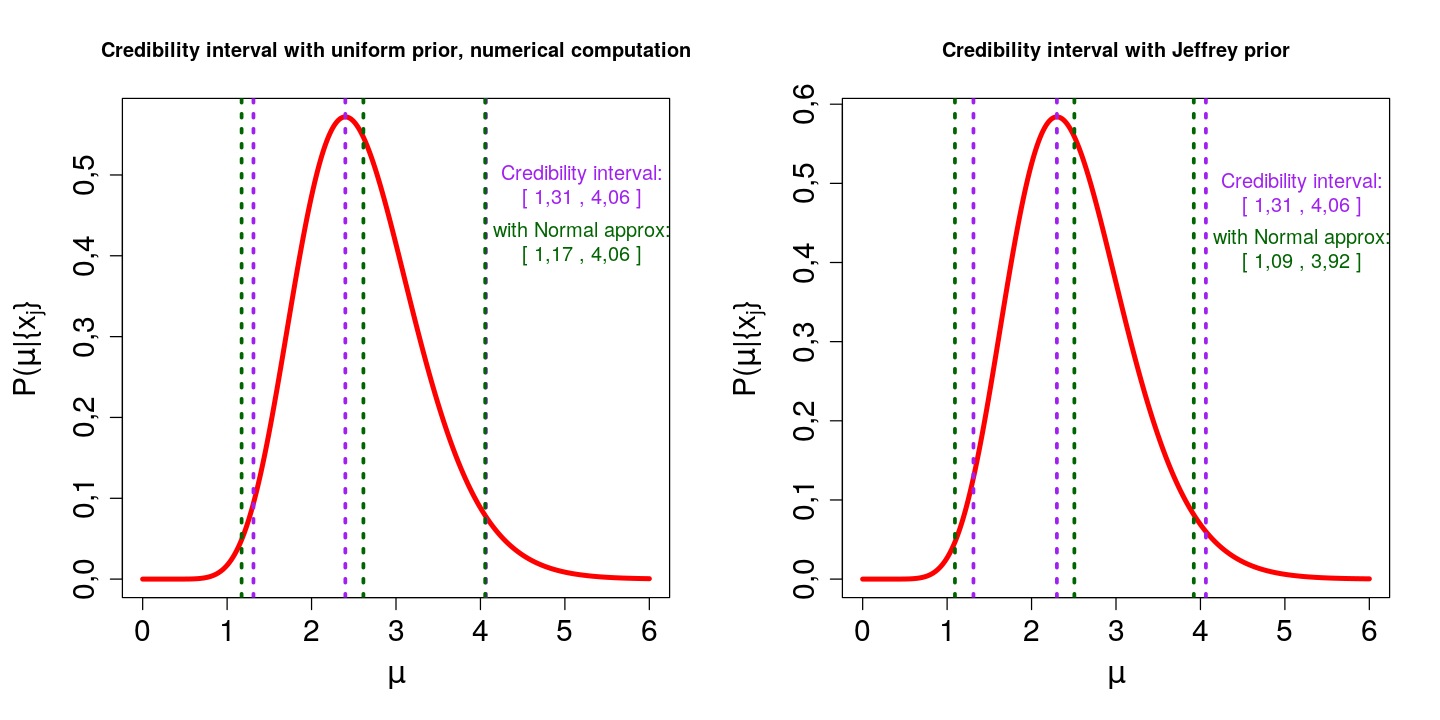

In [3]:
x <- seq(0,6,0.001)

flat_high <- qgamma(0.975, jeff_alpha, jeff_lambda)
jeff_high <- qgamma(0.975, jeff_alpha, jeff_lambda)
flat_low <-  qgamma(0.025, jeff_alpha, jeff_lambda)
jeff_low <-  qgamma(0.025, jeff_alpha, jeff_lambda)
flat_sig <- sqrt(flat_alpha)/flat_lambda
jeff_sig <- sqrt(jeff_alpha)/jeff_lambda

options(repr.plot.width=12,repr.plot.height=6)
par(cex.lab=1.5, cex.axis=1.5, cex.main=1, mar=c(5, 5, 4, 2) + 0.1)
area <- matrix (c(1,2), nrow=1, ncol=2, byrow=TRUE)
layout(area)

plot (x, dgamma(x, flat_alpha, flat_lambda), type='l', col='red', lwd=4, xlab=expression(mu), 
      ylab=expression("P("*mu*"|{x"[j]*"}"), 
      main='Credibility interval with uniform prior, numerical computation')
abline(v=flat_low, lwd=3, col='purple', lty='dotted')

abline(v=flat_nu_mode, lwd=3, col='purple', lty='dotted')
abline(v=flat_high, lwd=3, col='purple', lty='dotted')
                
abline(v=flat_nu_mean+2*flat_sig, lwd=3, col='darkgreen', lty='dotted')
abline(v=flat_nu_mean-2*flat_sig, lwd=3, col='darkgreen', lty='dotted')
abline(v=flat_nu_mean, lwd=3, col='darkgreen', lty='dotted')
text(5.2,0.5 , "Credibility interval:", col="purple")
text(5.2,0.47, paste("[",round(flat_low,2),"," ,
                     round(flat_high,2), "]"), col='purple')
text(5.2,0.43 , "with Normal approx:", col="darkgreen")
text(5.2,0.40, paste("[",round(flat_nu_mean-2*flat_sig,2),","
                     ,round(flat_nu_mean+2*flat_sig,2), "]"), col='darkgreen')

plot (x, dgamma(x, jeff_alpha, jeff_lambda), type='l', col='red', lwd=4, xlab=expression(mu), 
      ylab=expression("P("*mu*"|{x"[j]*"}"), 
      main='Credibility interval with Jeffrey prior')
abline(v=jeff_low, lwd=3, col='purple', lty='dotted')
abline(v=jeff_nu_mode, lwd=3, col='purple', lty='dotted')
abline(v=jeff_high, lwd=3, col='purple', lty='dotted')
                   
abline(v=jeff_nu_mean+2*jeff_sig, lwd=3, col='darkgreen', lty='dotted')
abline(v=jeff_nu_mean-2*jeff_sig, lwd=3, col='darkgreen', lty='dotted')
abline(v=jeff_nu_mean, lwd=3, col='darkgreen', lty='dotted')
text(5.2,0.5 , "Credibility interval:", col="purple")
text(5.2,0.47, paste("[",round(jeff_low,2),"," 
                     ,round(jeff_high,2), "]"), col='purple')
text(5.2,0.43 , "with Normal approx:", col="darkgreen")
text(5.2,0.40, paste("[",round(jeff_nu_mean-2*jeff_sig,2),","
                     ,round(jeff_nu_mean+2*jeff_sig,2), "]"), col='darkgreen')



## EX2

given the problem of the lightouse discussed last week, study the case in which both the position
along the shore (α) and the distance out at sea (β) are unknown

<img src="lighthouse.png">

**Solution**

From the Bayes theorem we can write:
$$P\left(\alpha, \beta |\left\{x_{k}\right\}\right) \propto P\left(\left\{x_{k}\right\} | \alpha, \beta\right) P(\alpha,\beta)$$

For one recorded flash if we assume an uniform distribution for the angle of the light emission with respect to the azimuthal angle we have an uniform likelihood with respect to $\theta_k$:

$$P\left(\theta_{k} | \alpha, \beta\right)=\frac{1}{\pi}$$

Knowing that $x_{k}-\alpha=\beta \tan \theta_{k}$ we can perform a change of variables, obtaining therefore the likelihood in function of the flashes position:

$$P(x | \alpha, \beta)=P(\theta | \alpha, \beta)\left|\frac{d \theta}{d x}\right|=\frac{1}{\pi} \frac{\beta}{\beta^{2}+(x-\alpha)^{2}}$$

The total likelihood distribution is then the product of the single likelihoods:

$$ P\left(\left\{x_{k}\right\} | \alpha, \beta\right)=
\prod_j \frac{1}{\pi} \frac{\beta}{\beta^{2}+(x_j-\alpha)^{2}}$$


Let's now consider the prior distribution, we can assume that the position along the show $\alpha$ and the distance from the shore $\beta$ are indipendent, we can then write

$$P(\alpha, \beta)=P(\alpha)P(\beta) $$

For both parameters we can then assume as prior an uniform distribution since we know nothing beforehand about the possible positions of the lighthouse:

$$P(\alpha)=\left\{\begin{array}{cl}
\frac{1}{\alpha_{\max }-\alpha_{\min }} & \text { for } x \in\left[\alpha_{\min }, \alpha_{\max }\right] \\
0 & \text { otherwise }
\end{array}\right.
\qquad
P(\beta)=\left\{\begin{array}{cl}
\frac{1}{\beta_{\max }-\beta_{\min }} & \text { for } x \in\left[\beta_{\min }, \beta_{\max }\right] \\
0 & \text { otherwise }
\end{array}\right.
$$
In this way we obtain that the posterior distribution is simply proportionaly to the likelihood function:

$$P\left(\alpha, \beta |\left\{x_{k}\right\}\right) = \frac{1}{C}\prod_j \frac{\beta}{\beta^{2}+(x_j-\alpha)^{2}}$$

where C is a normalization constant.

Instead of the posterior it's more convenient to first compute its logarithm and then elevate it:

$$L=\log P\left(\alpha,\beta  | x_{k} \right) =\text{ const }-\sum_j \log \left(\beta +\frac{(x_j-\alpha)^2}{\beta}\right) $$

We can now select two values for the true $\alpha$ and $\beta$ position ì and generate a data sample to see how effective is our predictor depending on the number of generated sample.


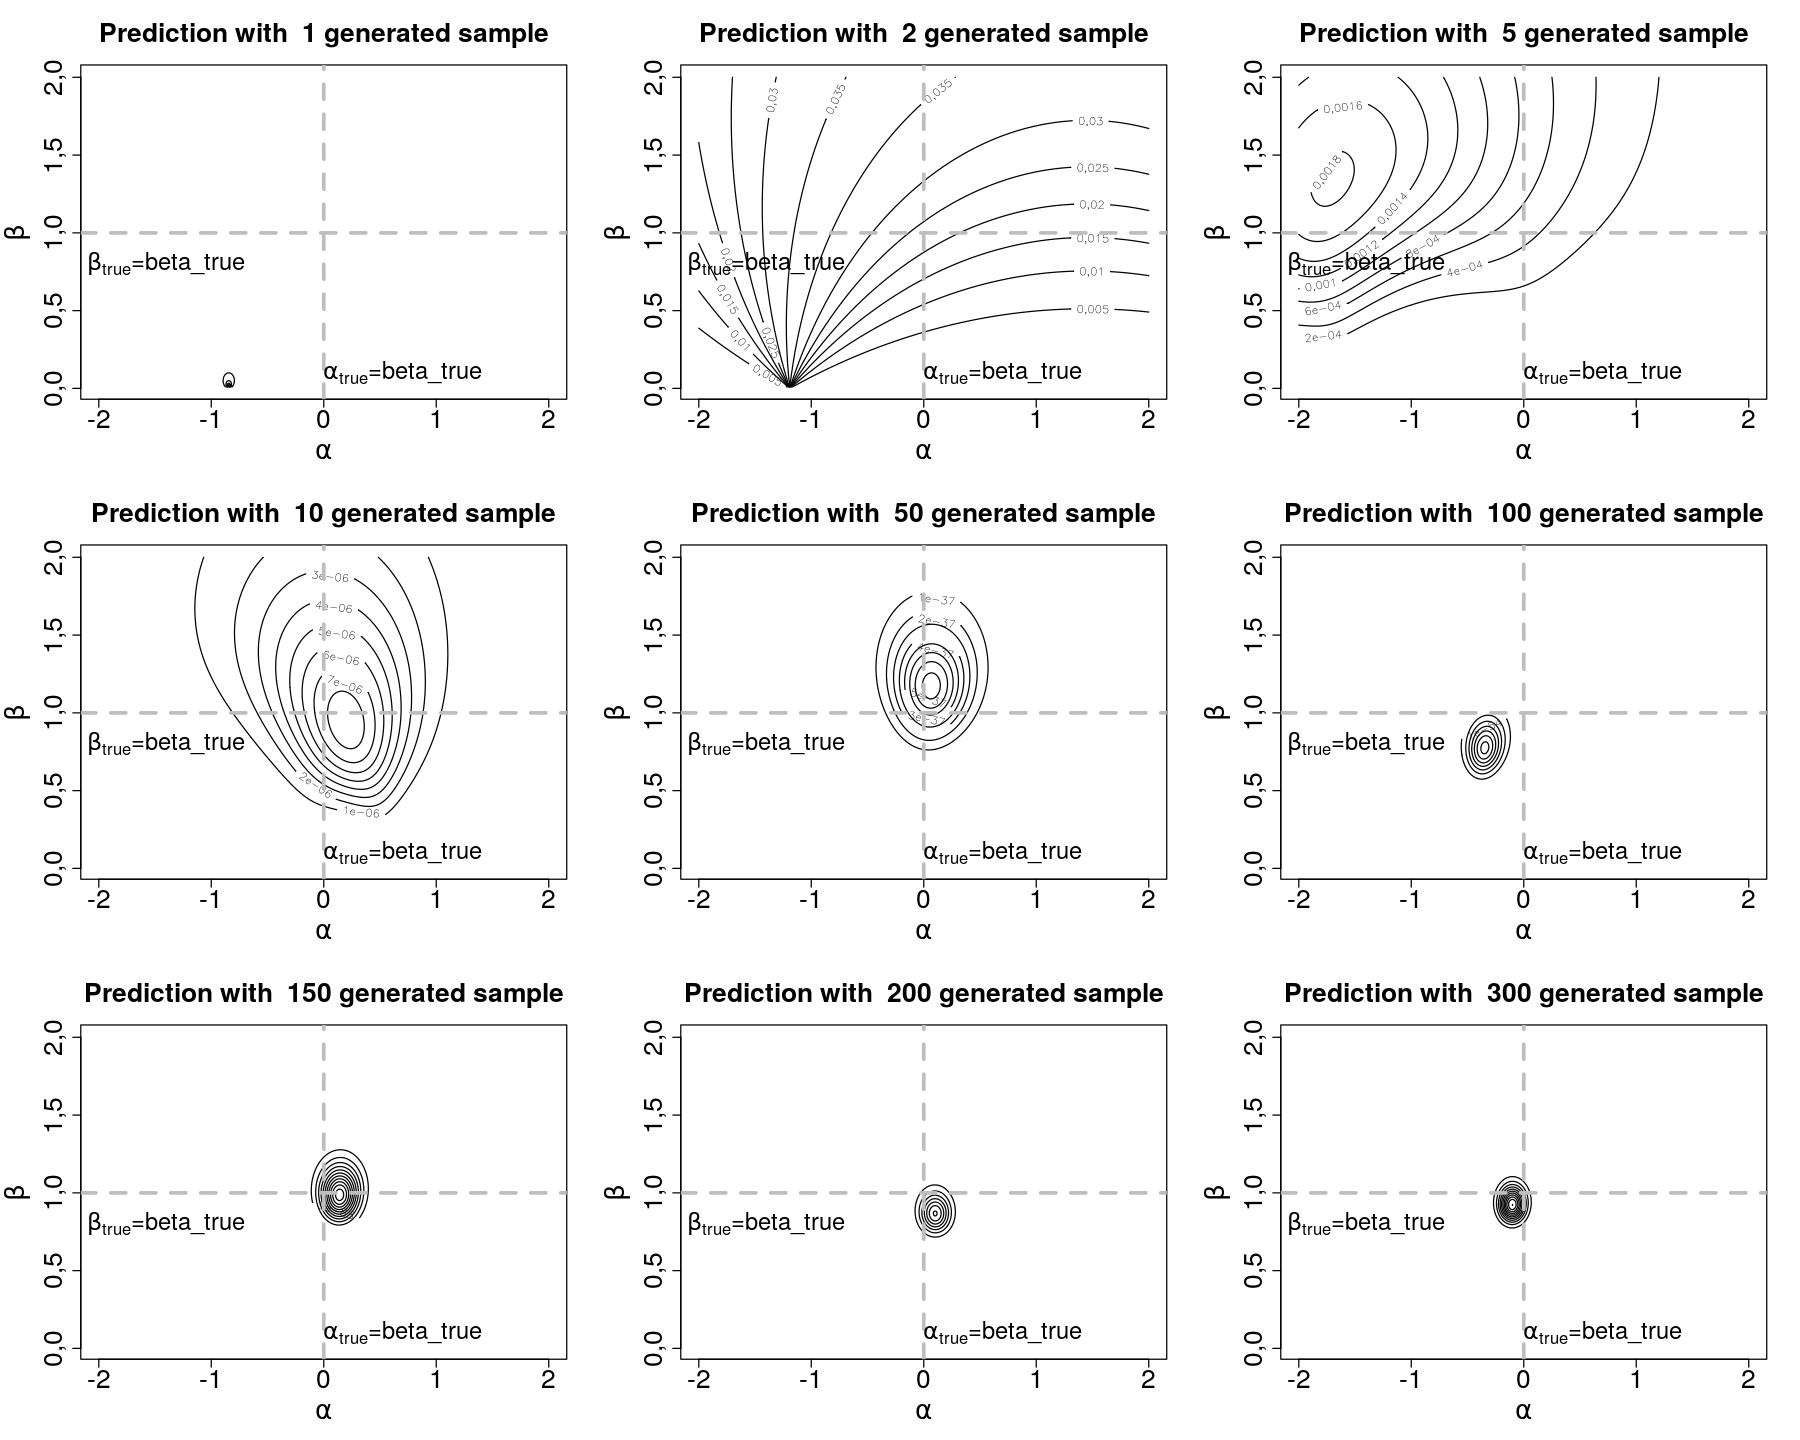

In [4]:
log_post_ab <- Vectorize(function(a,b,xk){ #function to compute the posterior
    log1 <- 0.0
    for (x in xk) log1 <- log1 - log(b +(x-a)^2/b)
    return (log1)
}, vectorize.args=c("a", "b"))

alpha_true <- 0 #true value unkown by the estimator
beta_true <-1

step <- 0.01 #define the grid step
alpha <- seq(-2, 2, step)
beta  <- seq( 0.01, 2, step)

par(cex.lab=2, cex.axis=2, cex.main=2, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=15,repr.plot.height=12)
area <- matrix (c(1,2,3,4,5,6,7, 8, 9), nrow=3, ncol=3, byrow=TRUE)
layout(area)

ns <- c(1,2,5,10,50,100, 150, 200,300)

for (n in ns){
    theta <- runif(n,-pi/2,pi/2) #generate uniform flashing angles
    x_k     <- beta_true * tan(theta) + alpha_true #compute the positions
    contour( alpha, beta,  exp(outer(alpha, beta, log_post_ab, xk=x_k)), 
            xlab=expression(alpha), ylab=expression(beta), main=paste("Prediction with ",n, "generated sample"))
    abline (v=alpha_true,h=beta_true,col="grey", lty="dashed", lwd=3)
    text(-1.4, 0.8, expression(paste(beta[true],"=", beta_true)), cex=1.8)
    text(0.7, 0.1, expression(paste(alpha[true],"=", beta_true)), cex=1.8)

}


As we expect with a bigger data size our posterior distribution estimation for the parameters visually converges to the true value, as well as the confidence inteval, which is visible since the contuor levels are tighter.

To give a better estimation of this we can marginalize the posterior distribution with respect to one paramenter and observe the distribution for the other. This procedure is done numerically in the code below by creating a grid of value for the posterior distribution and summing them by row/column and plot the resulting vector after a renormalization. 

In this way we are also able to estimate the prediction for the parameters and their credibility interval, in particular this estimation will be done using the normal approximation where the mean and the sigma are computed as:
$$\begin{array}{c}
\mu_{A}=\int A \cdot P(A | D) d A \sim \Delta A \sum_{k=1}^{K} A \cdot P\left(A_{j} | D\right) \\
\sigma_{A}^{2}=\int\left(A-\mu_{A}\right)^{2} P(A | D) d A \sim \Delta A \sum_{k=1}^{K}\left(A_{k}-\mu_{A}\right)^{2} P\left(A_{j} | D\right)
\end{array}$$


As before we can see the result depending on the size of the data set, for the sake of simplicity only some of the possible posteriors will be shown.

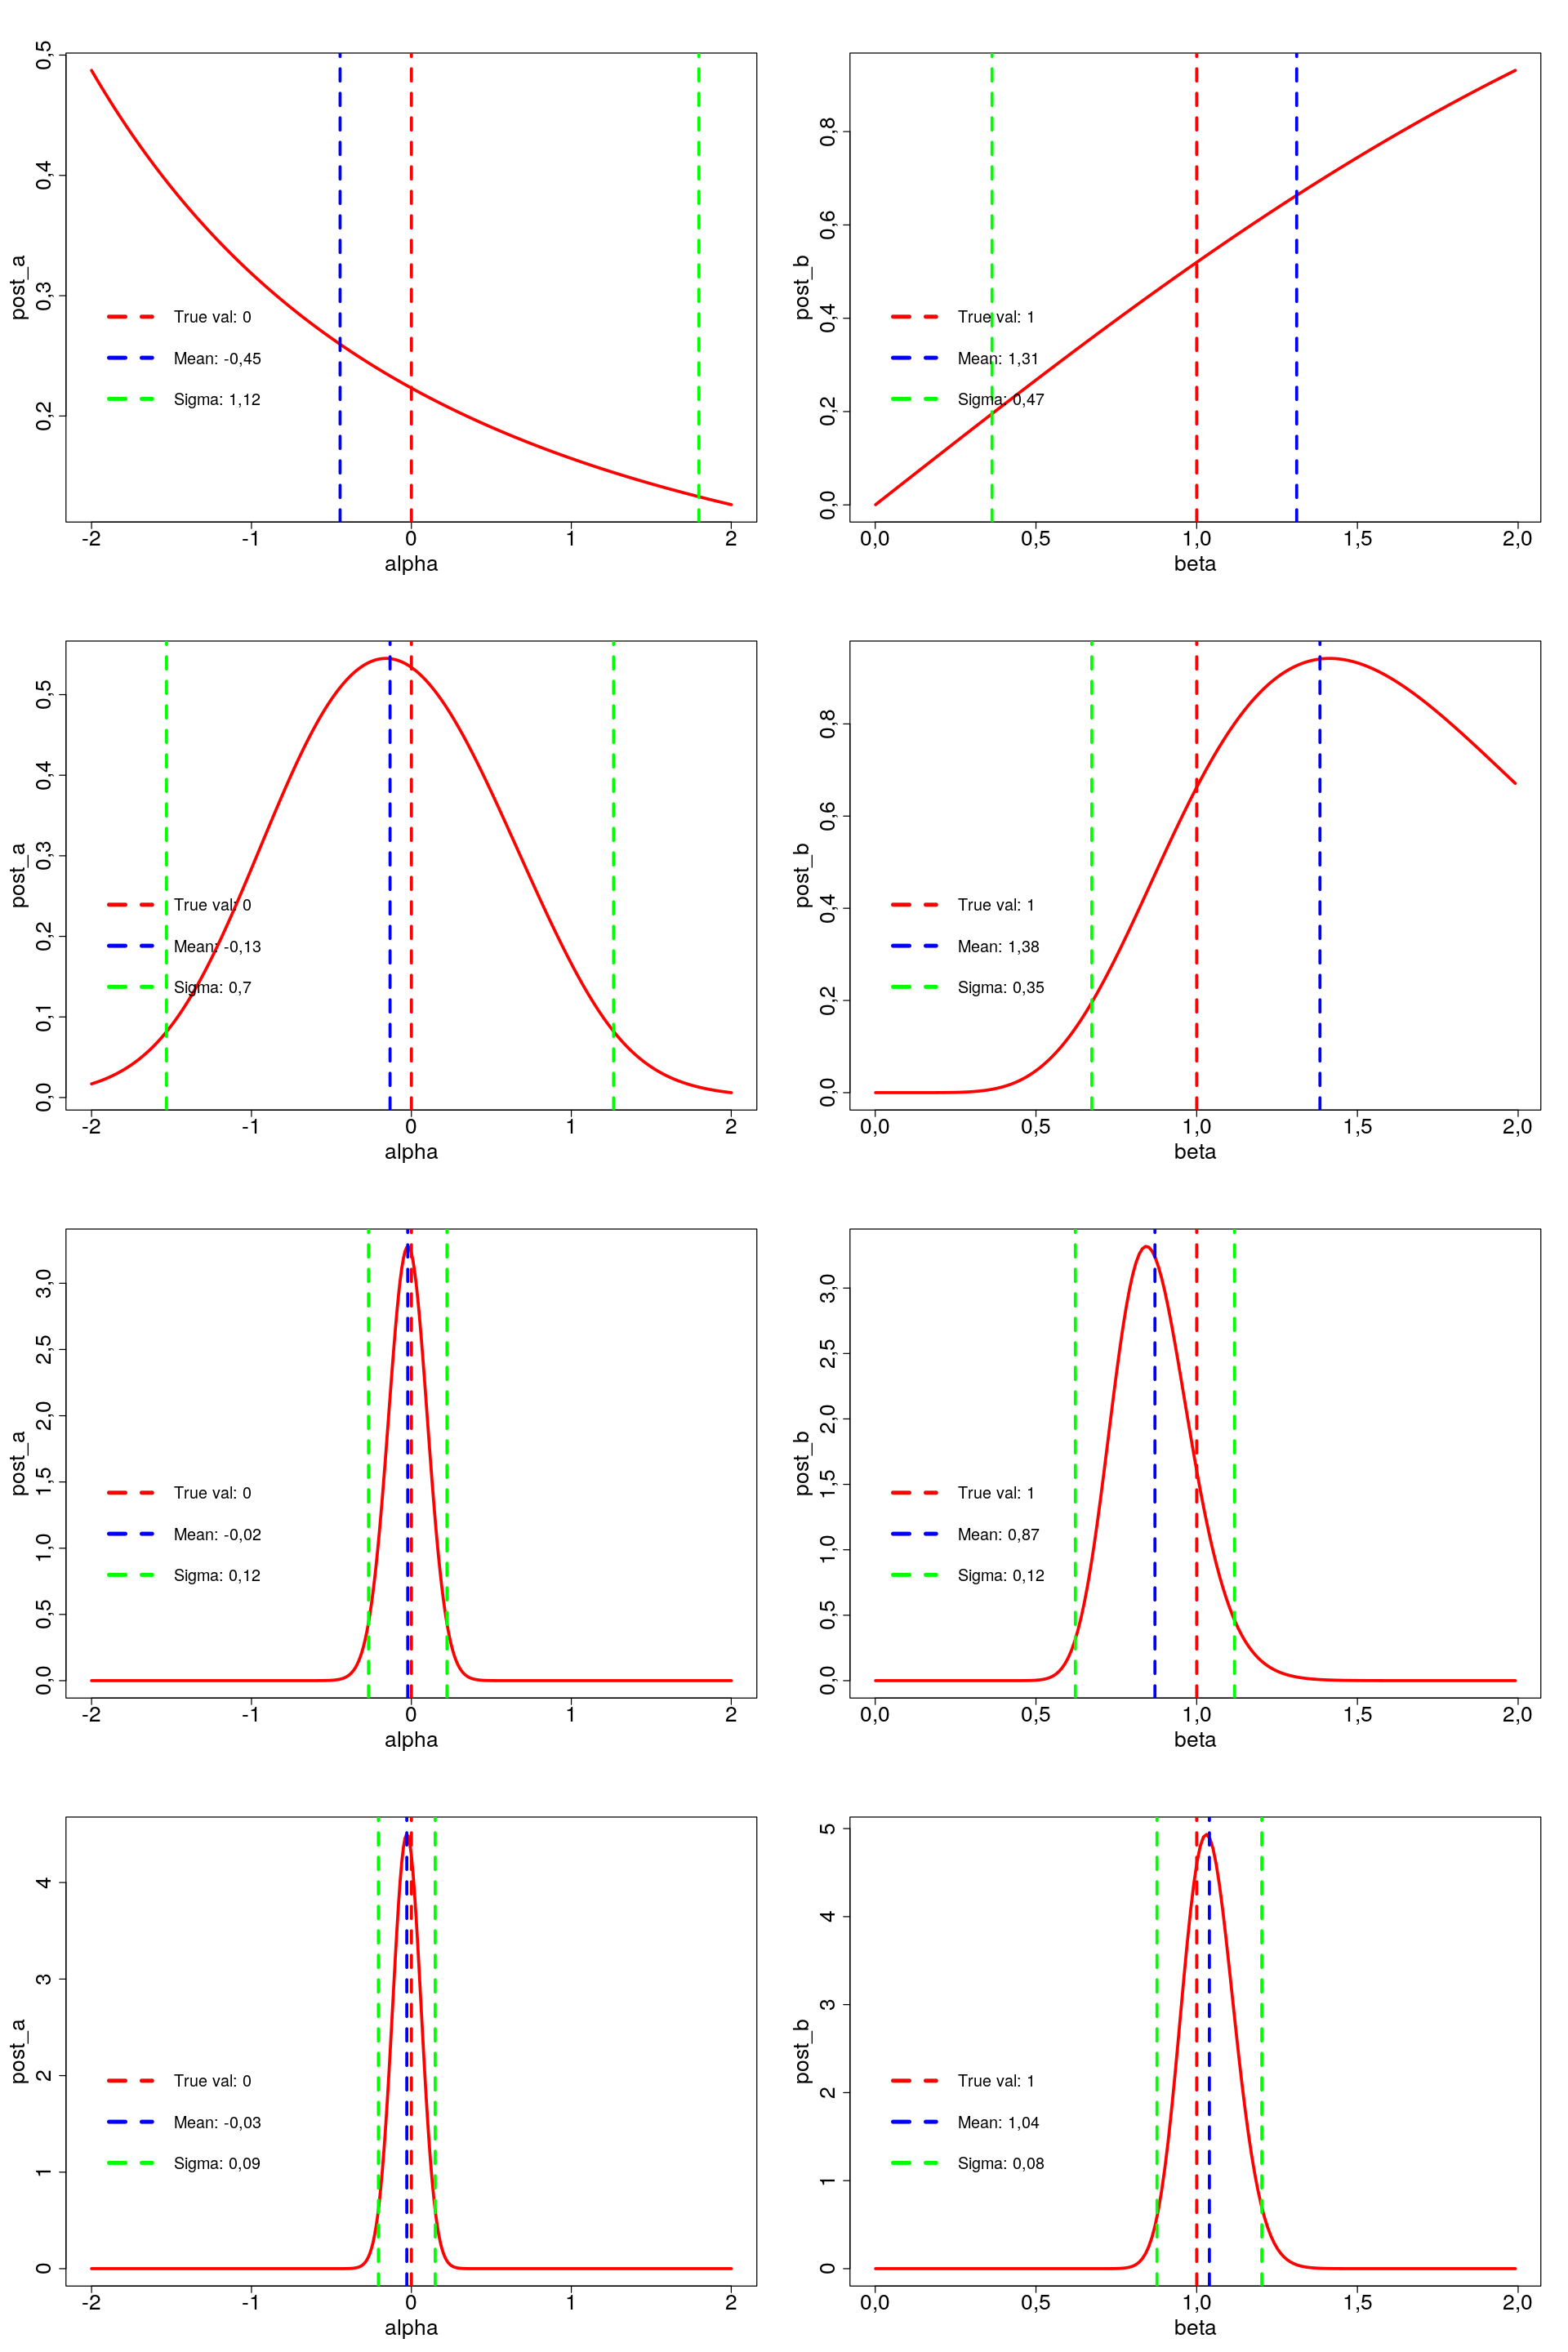

In [5]:
step <- 0.01
alpha <- seq(    -2, 2, step)
beta  <- seq( 0.001, 2, step)

par(cex.lab=2, cex.axis=2, cex.main=2, mar=c(5, 5, 4, 2) + 0.1)
options(repr.plot.width=16,repr.plot.height=24)
area <- matrix (c(1,2,3,4,5, 6,7,8), nrow=4, ncol=2, byrow=TRUE)
layout(area)

ns <- c(1,10,100, 300)

for (n in ns){
    theta <- runif(n,-pi/2,pi/2) #generate uniform flashing angles
    x_k     <- beta_true * tan(theta) + alpha_true #compute the positions
    grid <- exp(outer(alpha, beta, log_post_ab, xk=x_k))
    post_a <- apply(grid, 1, sum)
    post_a <- post_a/(sum(post_a)*step)
    post_b <- apply(grid, 2, sum)
    post_b <- post_b/(sum(post_b)*step)
    a_mean  <- sum( alpha*post_a)*step
    a_sigma <- sqrt(sum((alpha-a_mean)^2*post_a)*step)
    b_mean  <- sum( beta*post_b)*step
    b_sigma <- sqrt(sum((beta-b_mean)^2*post_b)*step)
    
    plot(alpha, post_a, type='l', col='red', lwd=3)
    abline(v=alpha_true, col='red', lty='dashed', lwd=3)
    abline(v=a_mean          , col='blue', lty='dashed', lwd=3)
    abline(v=a_mean+2*a_sigma, col='green', lty='dashed', lwd=3)
    abline(v=a_mean-2*a_sigma, col='green', lty='dashed', lwd=3)
    
        
    legend("bottomleft", legend=c(paste("True val:",round(alpha_true,2)), 
                               paste("Mean:", round(a_mean,2)) ,
                               paste("Sigma:", round(a_sigma,2))) ,
       col=c('red', 'blue', 'green') , lwd=4, bty='n',x.intersp=0.5, lty='dashed',
           y.intersp=0.2, cex=1.5, seg.len=1)  
    
    
    plot( beta, post_b, type='l', col='red', lwd=3 )
    abline(v=beta_true, col='red', lty='dashed', lwd=3)   
    abline(v=b_mean          , col='blue', lty='dashed', lwd=3)
    abline(v=b_mean+2*b_sigma, col='green', lty='dashed', lwd=3)
    abline(v=b_mean-2*b_sigma, col='green', lty='dashed', lwd=3)
    
    
    legend("bottomleft", legend=c(paste("True val:",round(beta_true,2)), 
                               paste("Mean:", round(b_mean,2)) ,
                               paste("Sigma:", round(b_sigma,2))) ,
       col=c('red', 'blue', 'green') , lwd=4, bty='n',x.intersp=0.5, lty='dashed',
           y.intersp=0.2, cex=1.5, seg.len=1)  

    
}





As we can see from the result for the set with more data the estimation of the parameters is closer to the true values with a tighter credibility interval.

Moreover we can see that for the case with only 1 data the normal approximation should not be used since due to the for of the posterior, however since the estimation of the parameters is completely wrong (as we can see from the contour plots) we can avoid doing further analysis.

## EX3
given the Signal over Background example discussed last week, analyze and discuss the following
cases:

In [6]:
signal <- function(x, a, b, x0, w, t) {
  t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}
logupost <- function(d, x, a, b, x0, w, t) {
  if(a<0 || b <0) {return(-Inf)} # the effect of the prior
  sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

SignBackAnalysis <- function(reso=1, A_true=2, B_true=1){

    alim  <- c(0.0, A_true+min(c(2, A_true/2)))
    blim  <- c(0.5, B_true+min(c(2, B_true/2)))
    Nsamp <- 1e2
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid 

    x0 <- 0; w <- reso; atrue <- A_true; btrue <- B_true; t <- 5; set.seed(205);
    xdat  <- seq(from=-7*w, to=7*w, by=0.5*w)
    strue <- signal(xdat, atrue, btrue, x0, w, t)
    ddat  <- rpois(length(strue), strue)
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
      for(k in 1:length(b)) {
        z[j,k] <- logupost(ddat, xdat, a[j], b[k], x0, w, t)
      }
    }
    z <- z - max(z)
    p_a_D <- apply(exp(z), 1, sum);  p_a_D <- p_a_D/(delta_a*sum(p_a_D));
    p_b_D <- apply(exp(z), 2, sum);  p_b_D <- p_b_D/(delta_b*sum(p_b_D));
    mean_a <- delta_a*sum(a*p_a_D); sd_a <- sqrt(delta_a*sum((a-mean_a)^2*p_a_D));
    mean_b <- delta_b*sum(b*p_b_D); sd_b <- sqrt(delta_b*sum((b-mean_b)^2*p_b_D));

    p_a_bD <- exp(Vectorize(logupost, "a")(ddat, xdat, a, btrue, x0, w, t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(logupost, "b")(ddat, xdat, atrue, b, x0, w, t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    options(repr.plot.width=16,repr.plot.height=4)
    par(mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(4,4,3,2), oma=0.1*c(1,1,1,1), cex.lab=1.5, cex.main=1.5)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, atrue, btrue, x0, w, t)
    plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="s or d", main=paste("W=",w, "   A/B =", atrue,"/",btrue),
         type="l", col="grey", lwd=2)
    par(new=TRUE)
    plot(xdat , ddat , type='s',col='firebrick3',
    lwd=2,xlim=range ( xplot), ylim= range (c(splot , ddat )))
    contour(a, b, exp(z), nlevels=5, labcex=0.5, lwd=2, xlab="amplitude, a",  main=paste("W=",w, "   A/B =", atrue,"/",btrue),
            ylab="background, b")
    abline(v=atrue,h=btrue,col="grey", lty='dotted', lwd=2)
    plot(b, p_b_D, xlab="background, b", yaxs="i", main=paste("W=",w, "   A/B =", atrue,"/",btrue),
         ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(b | D)  and  P(b | a,D)", 
         type="l", lwd=2 )
    lines(b, p_b_aD, lwd=2, lty=2)
    abline(v=btrue, col="black", lty='dotted', lwd=2)
    plot(a, p_a_D, xlab="amplitude, a", yaxs="i", main=paste("W=",w, "   A/B =", atrue,"/",btrue),
         ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(a | D)  and  P(a | b,D)", 
         type="l", lwd=2)
    lines(a, p_a_bD, lwd=2, lty=2)
    abline(v=atrue, col="black", lty='dotted', lwd=2)
}



**a)** vary the sampling resolution of used to generate the data, keeping the same sampling range
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
- change the resolution w = {0.1, 0.25, 1, 2, 3}
- Check the effect on the results

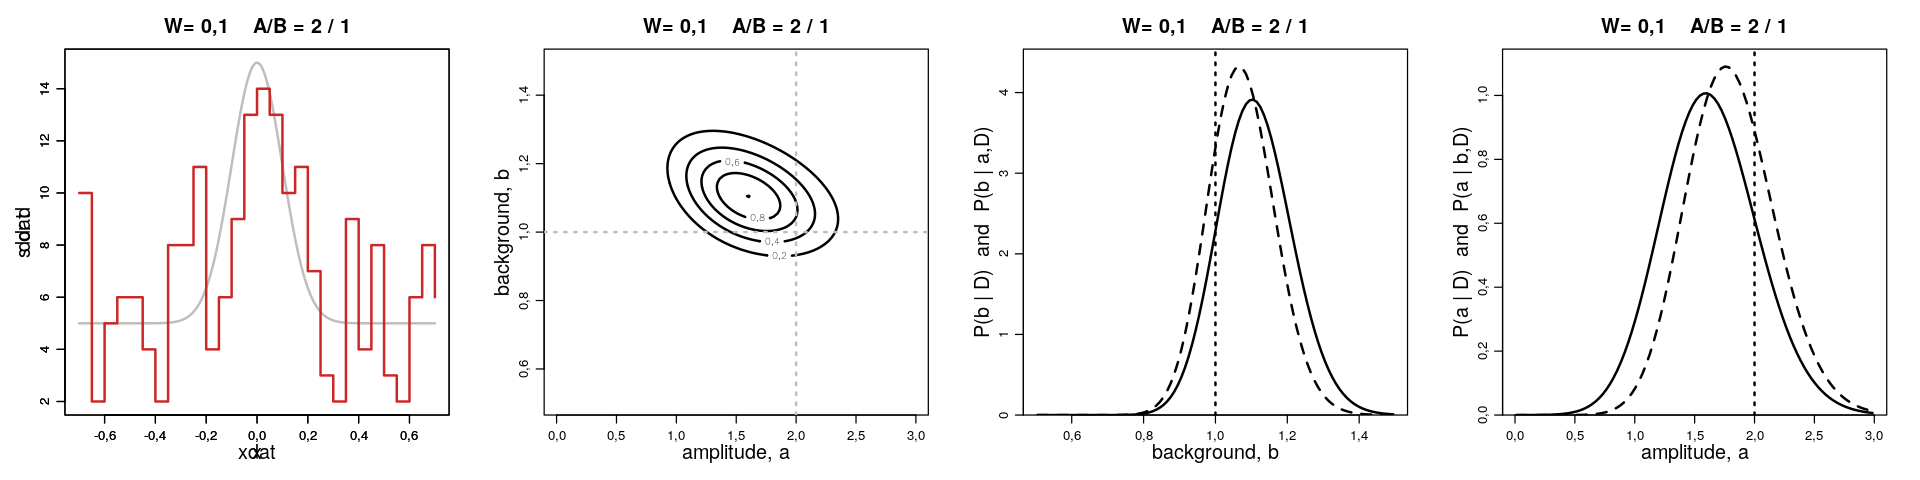

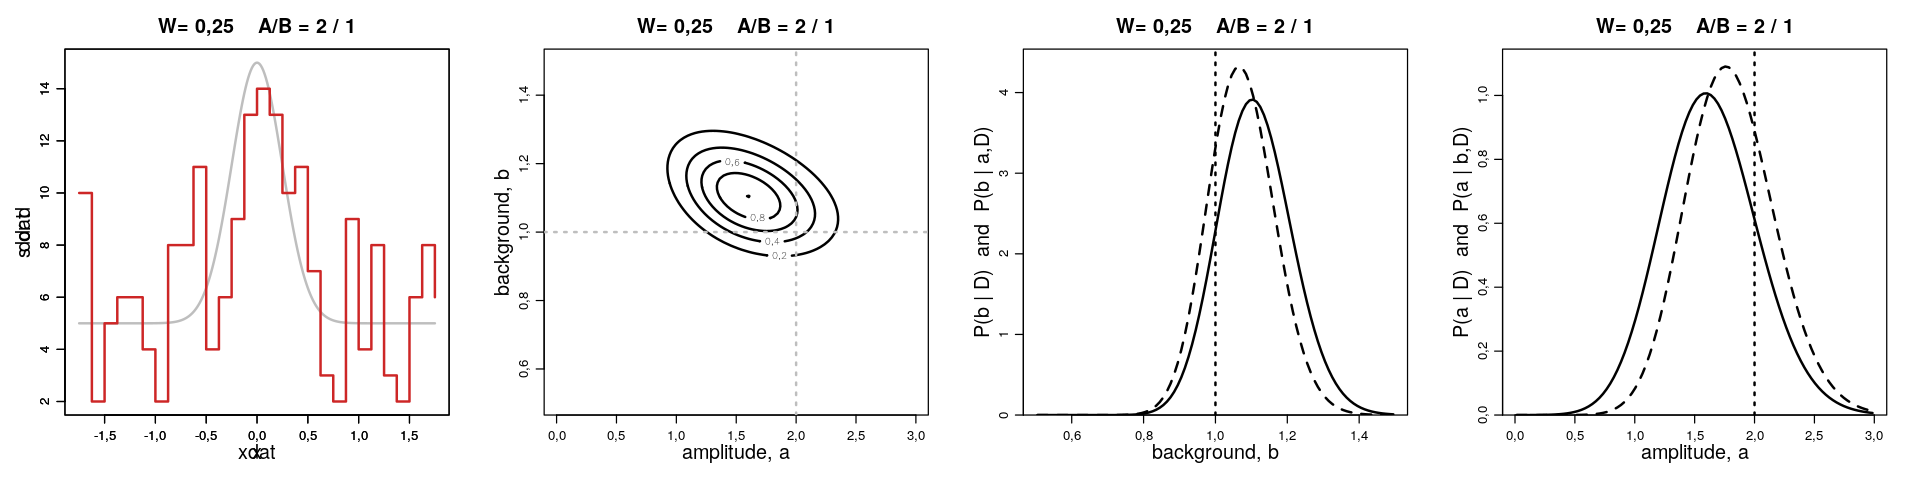

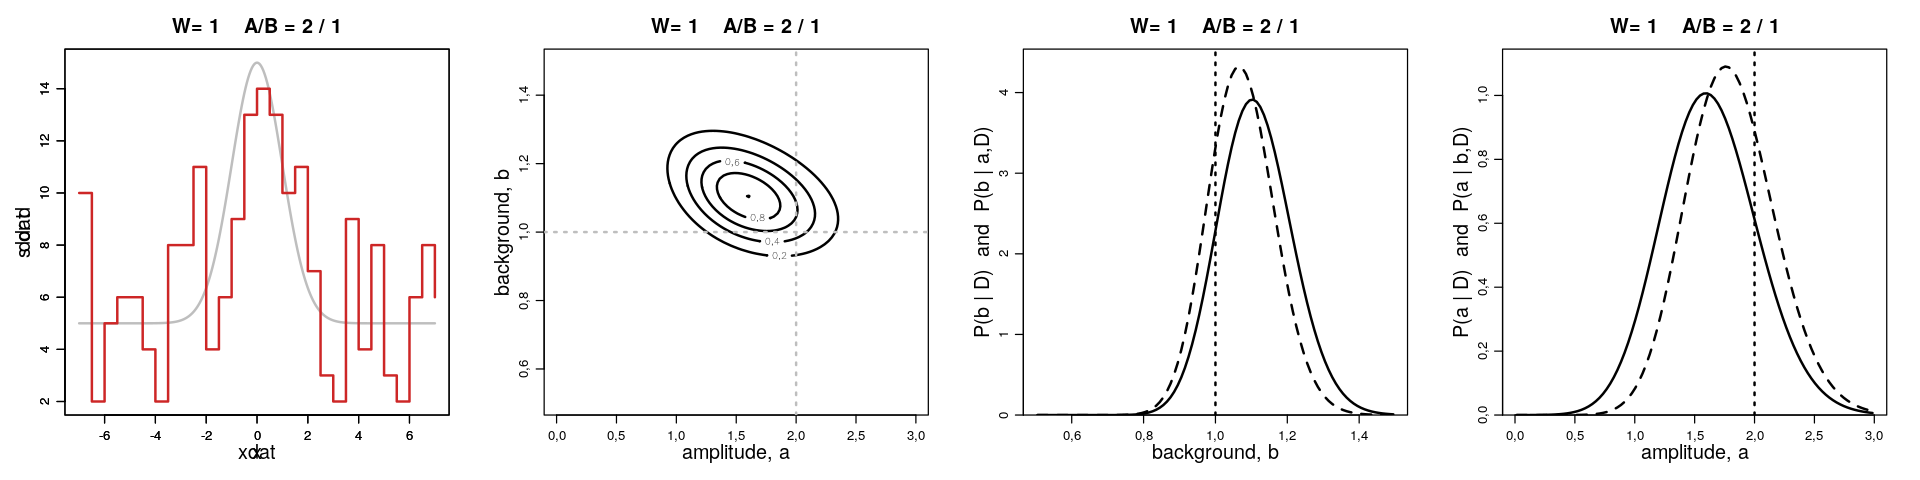

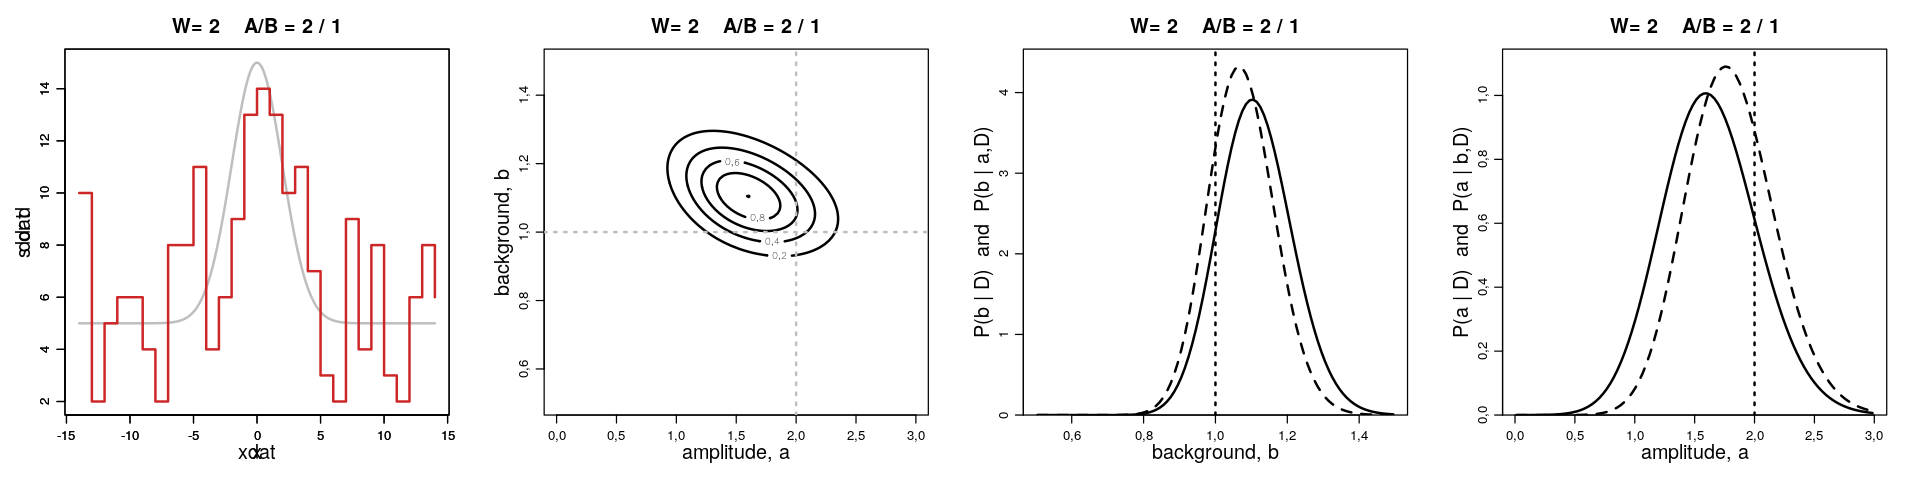

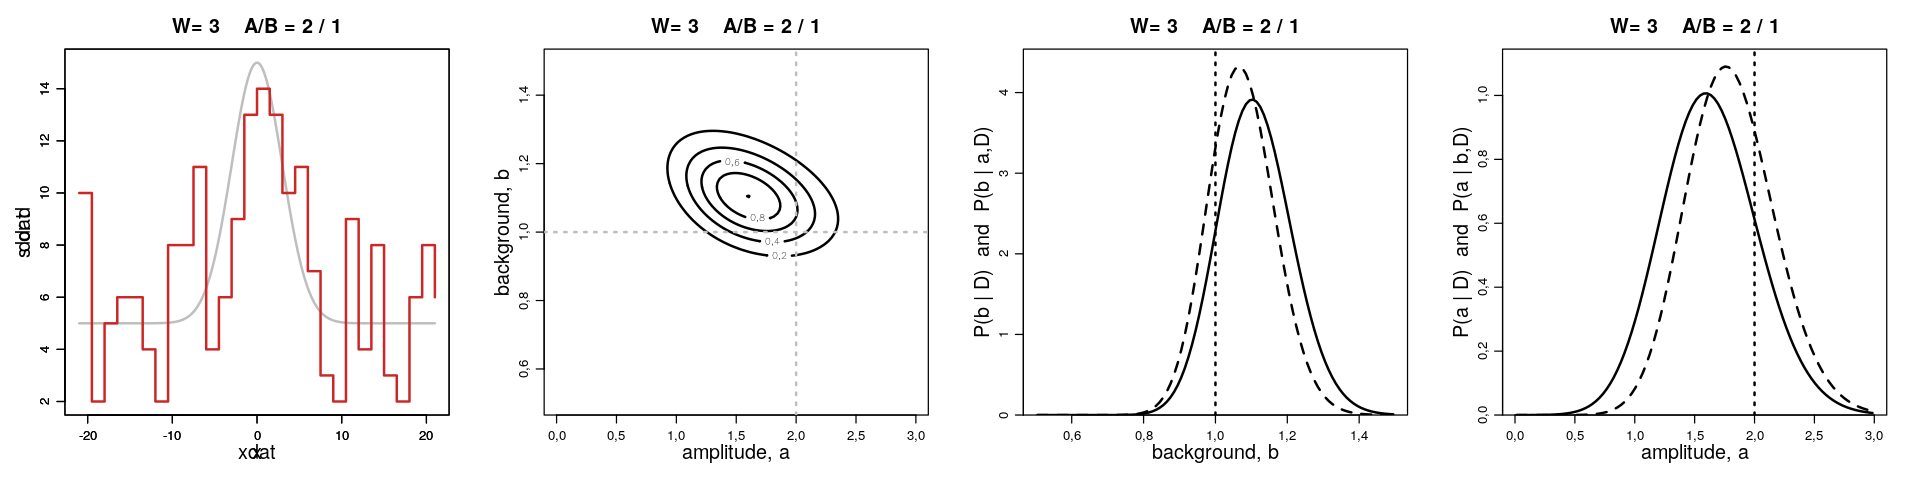

In [7]:
ws <- c(0.1, 0.25, 1, 2, 3)
for (w in ws) SignBackAnalysis(reso=w)


As we can see the change in the resolution does not have an impact on the posterior distribution, this is because in the data generation ***xdat <- seq(from=-7*w, to=7*w, by=0.5*w)*** the dependence of the interval buonds on the resolution as well as the step size makes the final result indipendent from the resolution which can then be interpreted as a scale factor.

**b)** change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
- Check the effect on the results

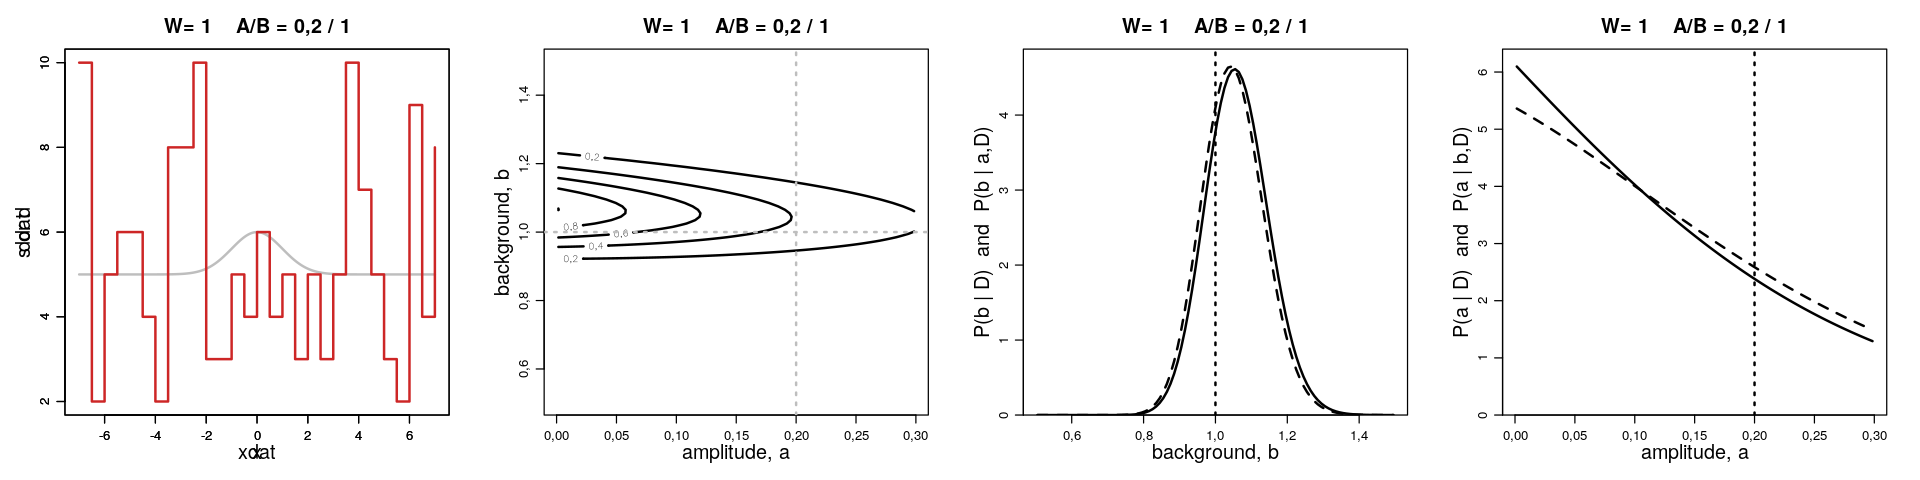

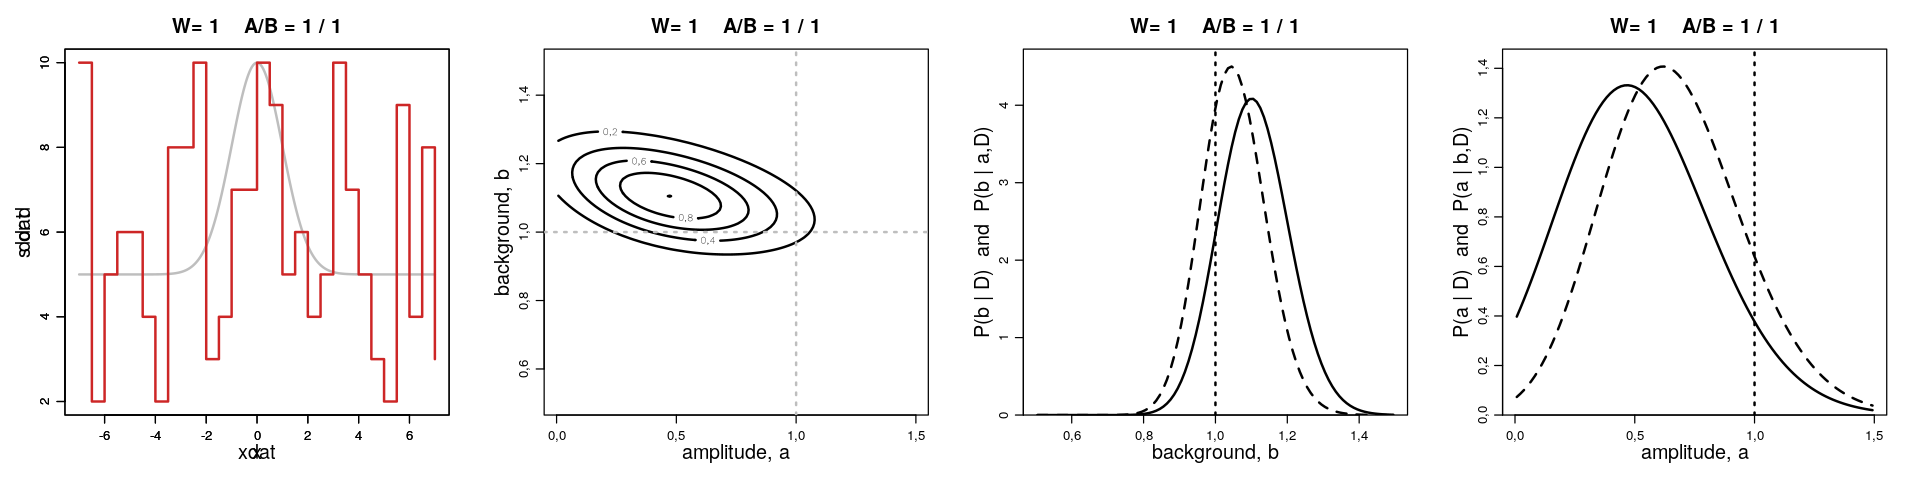

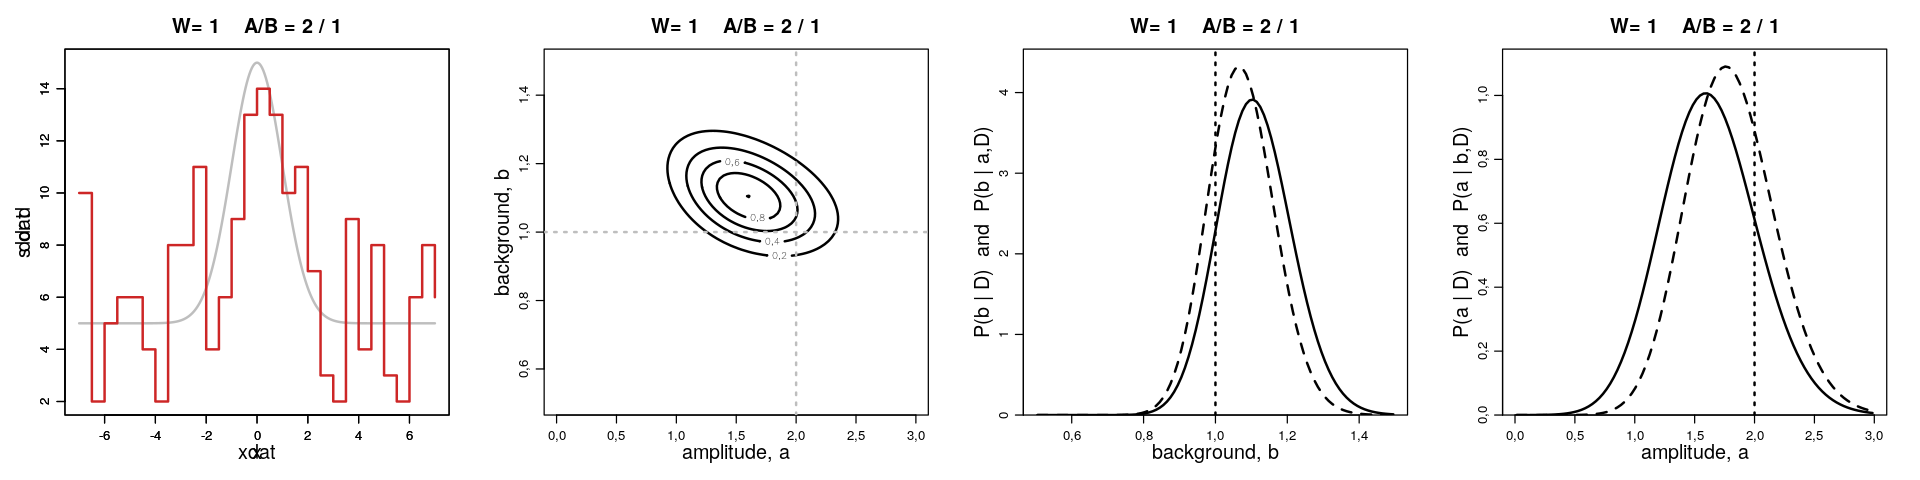

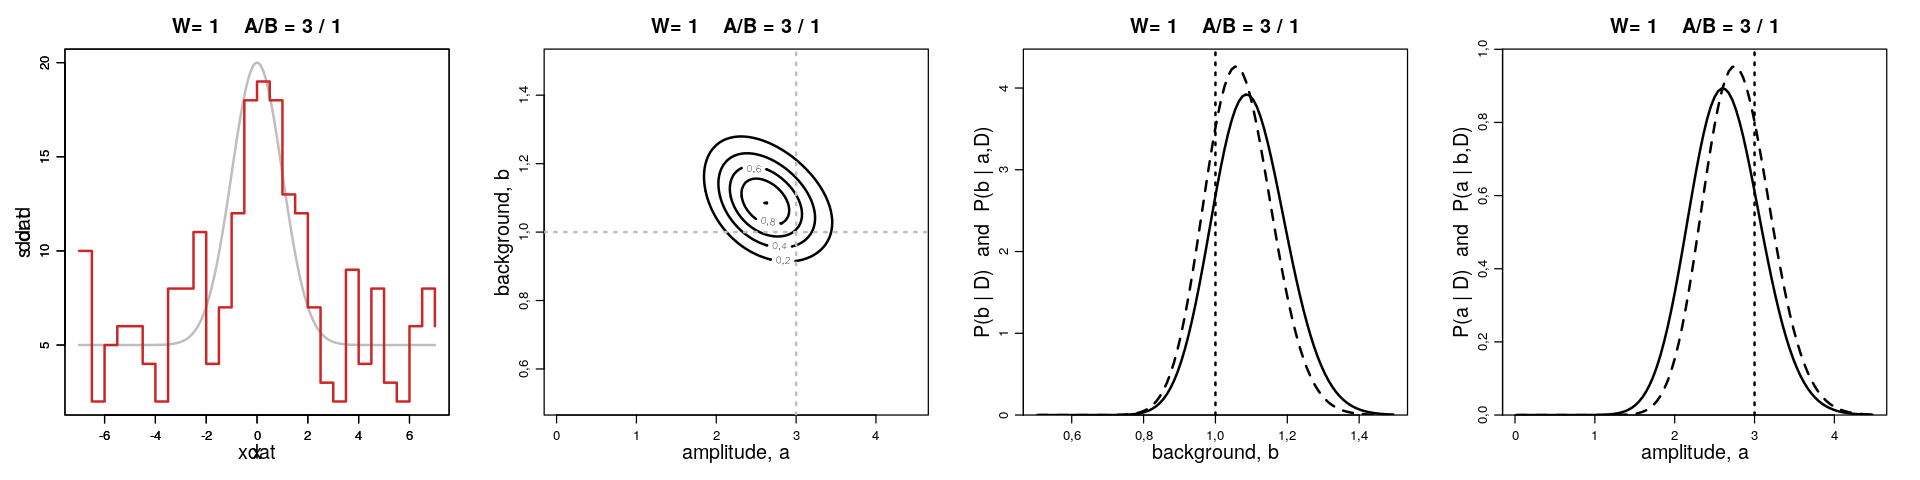

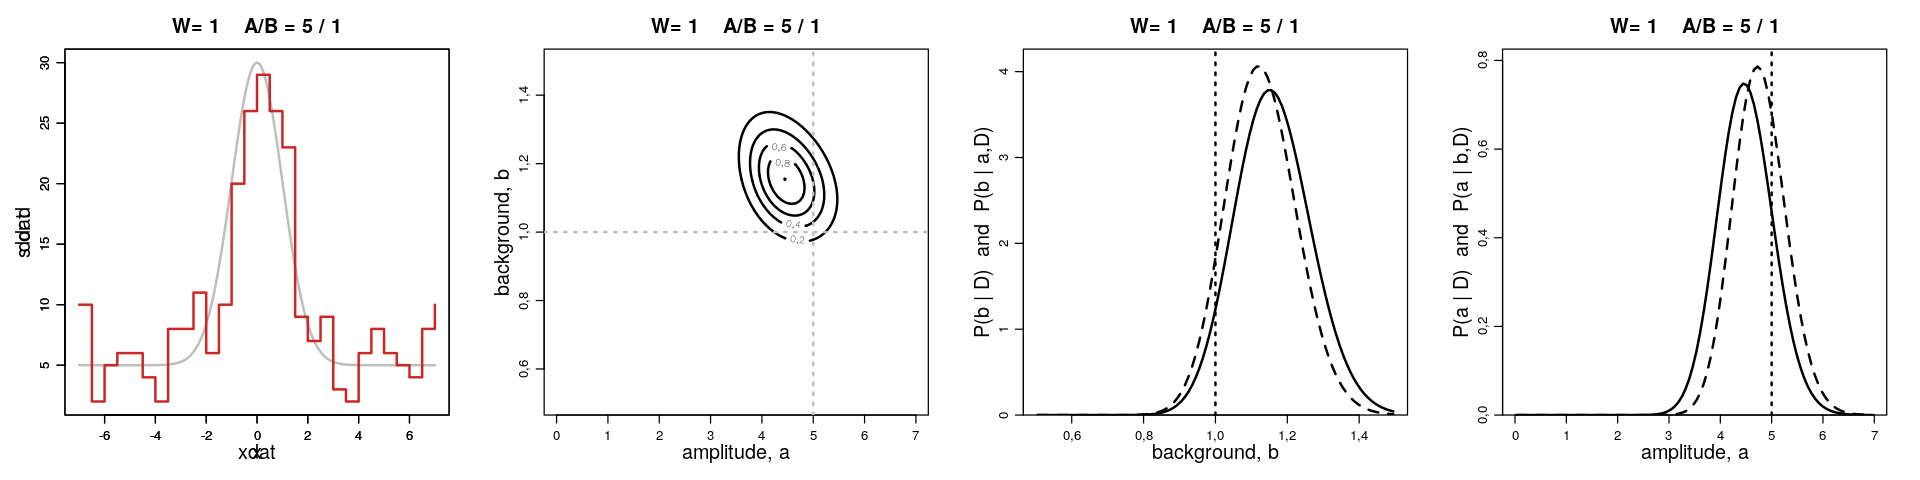

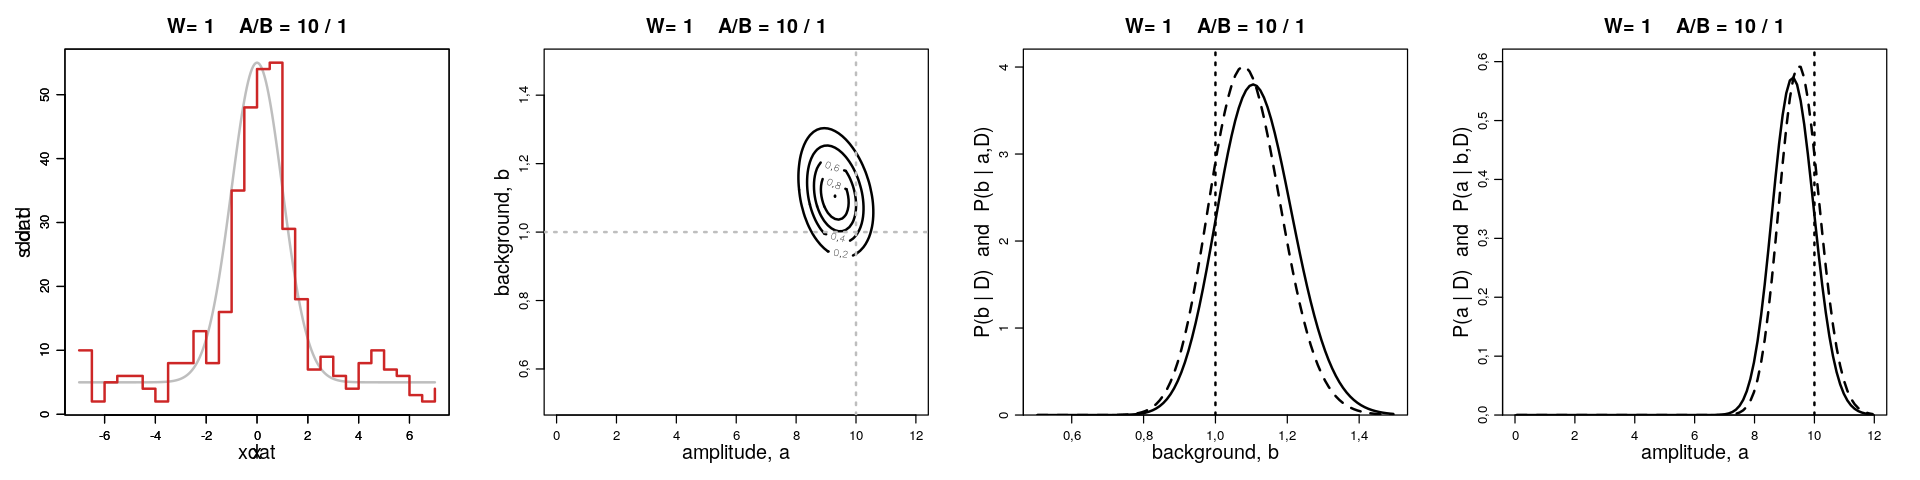

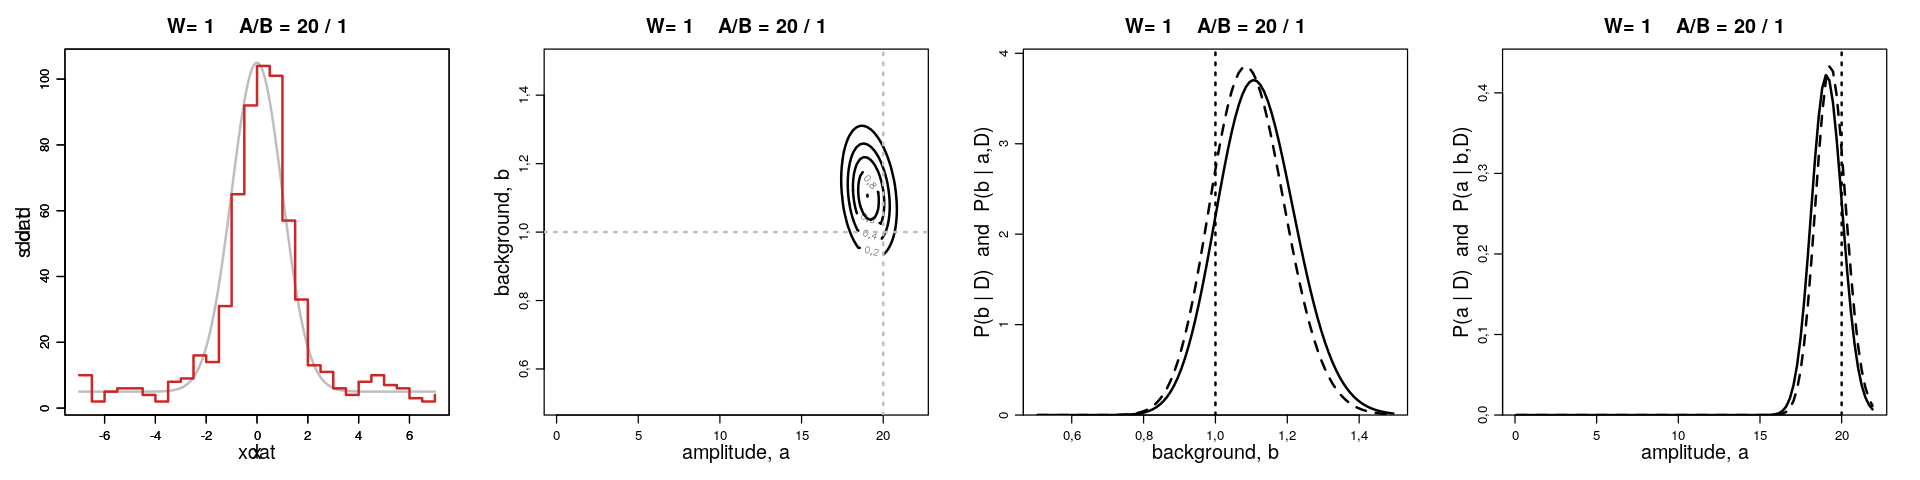

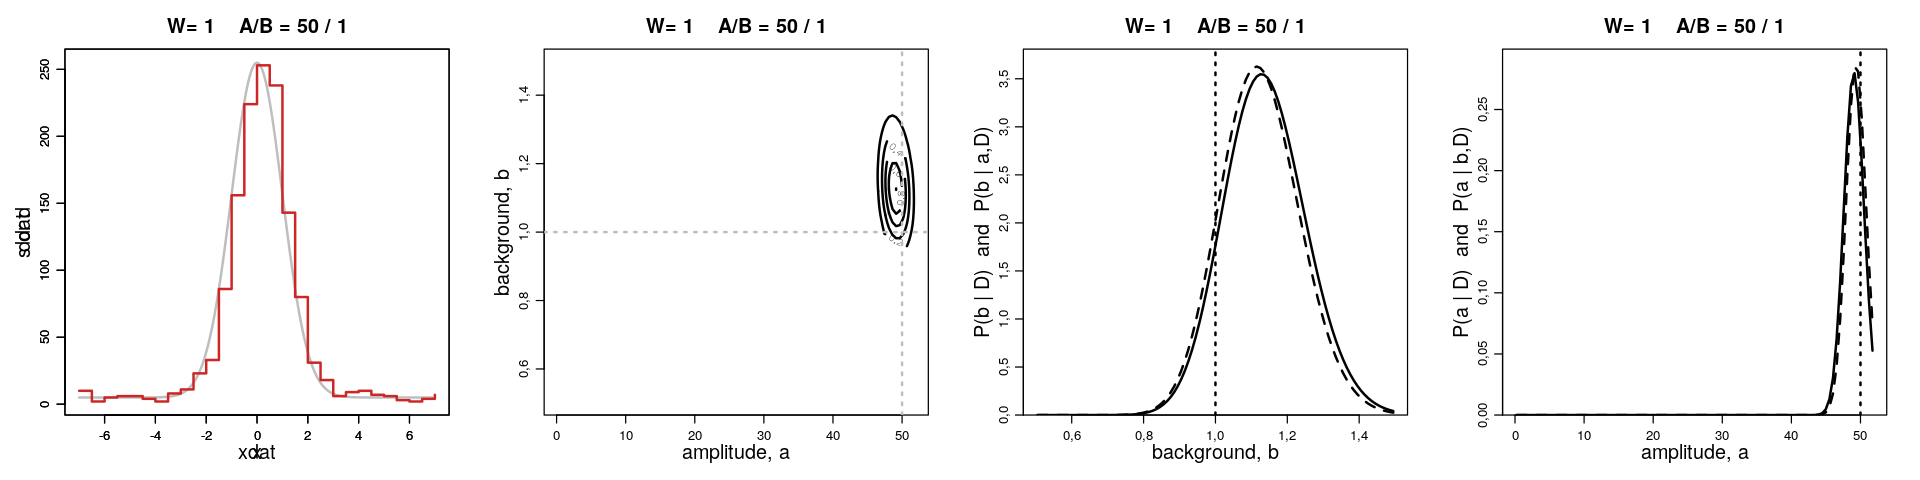

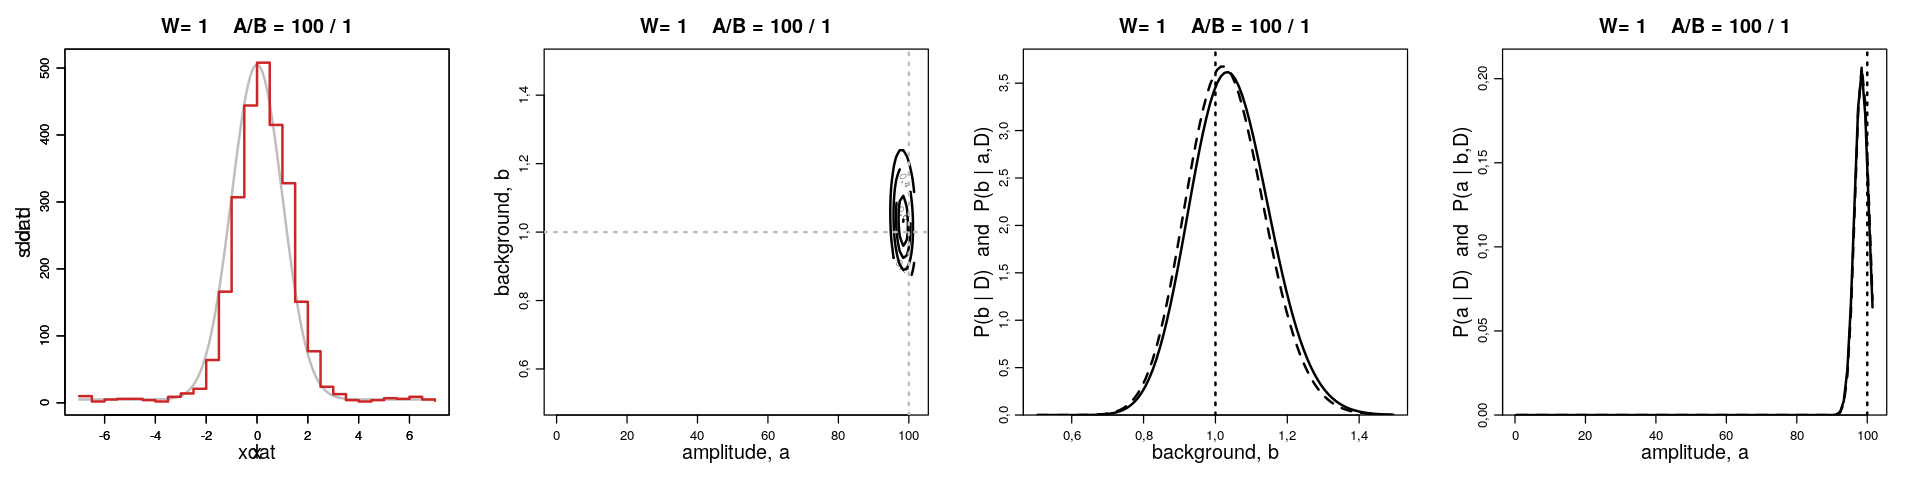

In [8]:
A <- c( 0.2,  1  , 2,3, 5 , 10, 20, 50, 100)
B <- c(1)
for (at in A) for (bt in B) SignBackAnalysis(A_true=at, B_true=bt)

As we can see the change in the signal to noise ratio has an important effect which grows with the ratio itself, in fact as we can see from the plots a bigger signal to noise ratio results in a having the marginalized posterior of the signal closer to the true value with a tighter credibility interval